In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [6]:
df['cabin_null'].mean()

0.7710437710437711

In [8]:
df.groupby('Survived')['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [9]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
def impute_nan(df,variable,mode):
    df[variable+'median'] = df[variable].fillna(median) 

In [15]:
median = df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)

In [17]:
df.isnull().mean()

Survived     0.000000
Age          0.198653
Fare         0.000000
Agemedian    0.000000
dtype: float64

In [19]:
print(df['Age'].std())
print(df['Agemedian'].std())

14.526497332334044
13.019696550973194


In [22]:
import matplotlib.pyplot as plt

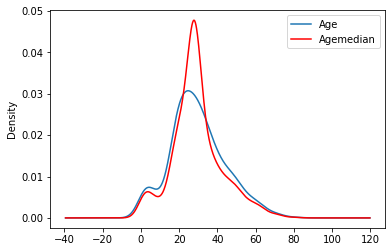

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Agemedian.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [2]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
       ...  
396    31.00
452    30.00
395    22.00
882    22.00
821    27.00
314    43.00
622    20.00
204    18.00
60     22.00
731    11.00
81     29.00
676    24.50
433    17.00
378    20.00
174    56.00
624    21.00
642     2.00
157    30.00
427    19.00
698    49.00
179    36.00
24      8.00
630    80.00
458    50.00
49     18.00
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [11]:
median = df.Age.median()

In [12]:
impute_nan(df,"Age",median)

In [13]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

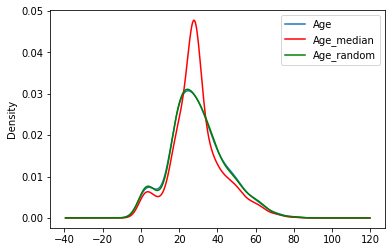

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [16]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [18]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [19]:
df.Age.median()

28.0

In [22]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [23]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [24]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


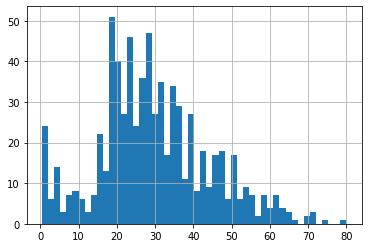

In [25]:

df.Age.hist(bins=50)

In [26]:
extreme=df.Age.mean()+3*df.Age.std()

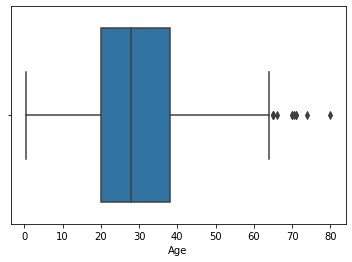

In [27]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [28]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [29]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [30]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


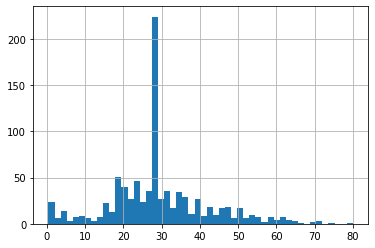

In [31]:
df['Age'].hist(bins=50)

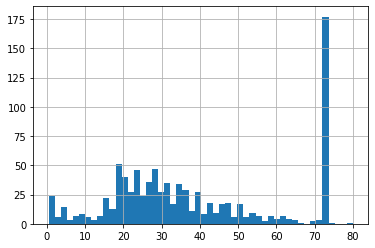

In [32]:
df['Age_end_distribution'].hist(bins=50)

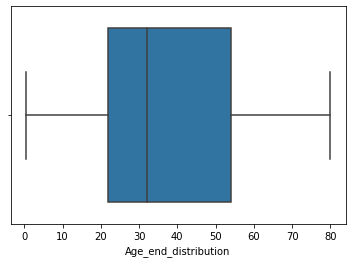

In [33]:
sns.boxplot('Age_end_distribution',data=df)

In [34]:
import pandas as pd

In [35]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [39]:
import pandas as pd
df = pd.read_csv('datasets_465671_874606_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [40]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [43]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

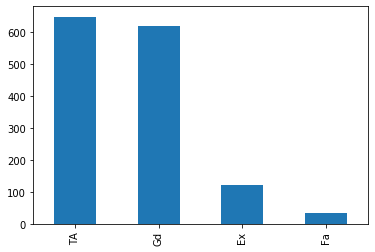

In [47]:
df['BsmtQual'].value_counts().plot.bar()

In [54]:
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending=True)

BsmtQual
Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

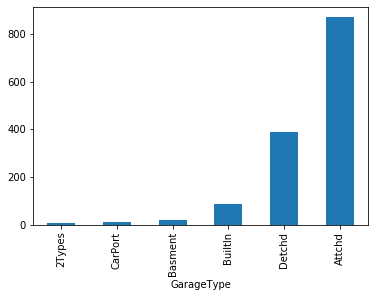

In [55]:
df.groupby('GarageType')['GarageType'].count().sort_values(ascending=True).plot.bar()

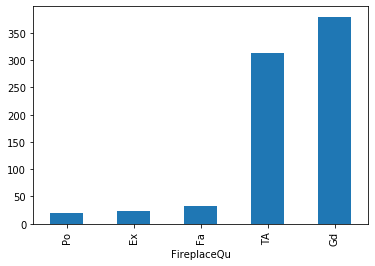

In [56]:
df.groupby('FireplaceQu')['FireplaceQu'].count().sort_values(ascending=True).plot.bar()

In [61]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [62]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [63]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [65]:
df=pd.read_csv('datasets_465671_874606_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [66]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [67]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [72]:
frequent = df['BsmtQual'].mode()[0]

In [73]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [74]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [75]:
df.head(2)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0


In [77]:
df=pd.read_csv('datasets_465671_874606_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [78]:
df.head(2)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500


In [79]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [80]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [81]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [83]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Sex'])

In [84]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [85]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [86]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [87]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [88]:
df.dropna(inplace=True)

In [90]:
pd.get_dummies(df, drop_first=True).head(2)

,Embarked_Q,Embarked_S
0,0,1
1,0,0


In [92]:
df=pd.read_csv('mercedesbenz.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [93]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [94]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ab      1
g       1
ac      1
Name: X0, dtype: int64

In [95]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [96]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [97]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [98]:
lst_10.append('X1')

In [100]:
df[lst_10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v


In [101]:
import datetime

In [102]:
today_date = datetime.datetime.today()

In [103]:
today_date

datetime.datetime(2020, 7, 24, 16, 26, 11, 244404)

In [104]:
today_date-datetime.timedelta(3)

datetime.datetime(2020, 7, 21, 16, 26, 11, 244404)

In [105]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [106]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]

In [107]:
data.head(2)

,Day
0,2020-07-24 16:26:11.244404
1,2020-07-23 16:26:11.244404


In [108]:
data['weekday']=data['Day'].dt.weekday_name
data.head()

,Day,weekday
0,2020-07-24 16:26:11.244404,Friday
1,2020-07-23 16:26:11.244404,Thursday
2,2020-07-22 16:26:11.244404,Wednesday
3,2020-07-21 16:26:11.244404,Tuesday
4,2020-07-20 16:26:11.244404,Monday


In [109]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [110]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [111]:
data.head()

,Day,weekday,weekday_ordinal
0,2020-07-24 16:26:11.244404,Friday,5
1,2020-07-23 16:26:11.244404,Thursday,4
2,2020-07-22 16:26:11.244404,Wednesday,3
3,2020-07-21 16:26:11.244404,Tuesday,2
4,2020-07-20 16:26:11.244404,Monday,1


In [112]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [113]:
columns=[1,3,5,6,7,8,9,13]

In [114]:
train_set=train_set[columns]

In [115]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [116]:
for feature in train_set.columns:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [120]:
country_map = train_set['Country'].value_counts().to_dict()

In [121]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


In [122]:

import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [123]:
df['Cabin'].fillna('Missing',inplace=True)

In [130]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [131]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [132]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [133]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [134]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [135]:
enumerate(ordinal_labels,0)

In [138]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [139]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [140]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [141]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [142]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


In [143]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [144]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
